# 课时12 逻辑回归实现

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print('Tensorflow Version:', tf.__version__)

Tensorflow Version: 2.0.0


In [7]:
# pandas.read_csv("data.csv")默认情况下，会把数据内容的第一行默认为字段名标题
# 为了解决这个问题，我们添加"header=None"，告诉函数，我们读取的原始文件数据没有列索引。
# 因此，对于credit-a.csv数据，它是没有表头的，因此使用read_csv需要添加表头。
data = pd.read_csv('../credit-a.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,0,21.08,10.085,1,1,11,1,1.25,1,1,0,1,0,260,0.0,1
649,1,22.67,0.750,0,0,0,0,2.00,1,0,2,0,0,200,394.0,1
650,1,25.25,13.500,1,1,13,7,2.00,1,0,1,0,0,200,1.0,1
651,0,17.92,0.205,0,0,12,0,0.04,1,1,0,1,0,280,750.0,1


In [8]:
# 对于上面的数据，第15列数据是标签值，可以通过下面的句子得出数据对应的问题是二分类问题
data.iloc[:, -1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

In [10]:
# 取出所有的x值和y值, 并将y值替换为0和1的标签
x = data.iloc[:, :-1]
# df.replace(to_replace, value) 前面是需要替换的值，后面是替换后的值。
# 这样会搜索整个DataFrame, 并将所有符合条件的元素全部替换。
# 进行上述操作之后，其实原DataFrame是并没有改变的。改变的只是一个复制品。
# 如果需要改变原数据，需要添加常用参数 inplace=True
# https://www.cnblogs.com/Allen-rg/p/10148212.html
y = data.iloc[:, -1].replace(-1, 0)

# 建立模型

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_shape=(15, ), activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


# 模型编译

In [12]:
# metrics=['acc'], metrics可以放入想要进行计算的参数，这里填入'acc'用于计算正确率
# ['acc']代表最后的计算结果是列表
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# 模型训练

In [13]:
# history用于收集训练时的各种参数
history = model.fit(x, y, epochs=100)

Train on 653 samples
Epoch 1/100
653/653 [==============================] - 1s 2ms/sample - loss: 5.3623 - acc: 0.4395
Epoch 2/100
653/653 [==============================] - 0s 95us/sample - loss: 3.3795 - acc: 0.4410
Epoch 3/100
653/653 [==============================] - 0s 87us/sample - loss: 1.6290 - acc: 0.4655
Epoch 4/100
653/653 [==============================] - 0s 89us/sample - loss: 1.1351 - acc: 0.5544
Epoch 5/100
653/653 [==============================] - 0s 81us/sample - loss: 0.9261 - acc: 0.5375
Epoch 6/100
653/653 [==============================] - 0s 82us/sample - loss: 0.8265 - acc: 0.5421
Epoch 7/100
653/653 [==============================] - 0s 89us/sample - loss: 0.7556 - acc: 0.5681
Epoch 8/100
653/653 [==============================] - 0s 84us/sample - loss: 0.7255 - acc: 0.5697
Epoch 9/100
653/653 [==============================] - 0s 79us/sample - loss: 0.7056 - acc: 0.5743
Epoch 10/100
653/653 [==============================] - 0s 84us/sample - loss: 0.6956 - a

In [14]:
# 通过history参数的keys可以看到收集了哪些相关的信息
history.history.keys()

dict_keys(['loss', 'acc'])

Text(0, 0.5, 'history.history.get("loss")')

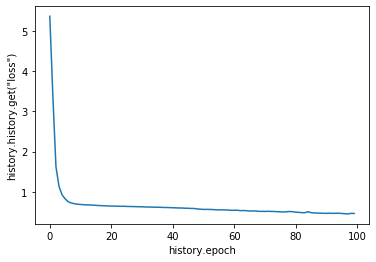

In [20]:
# loss随epoch的变化情况
plt.plot(history.epoch, history.history.get('loss'))
plt.xlabel('history.epoch')
plt.ylabel('history.history.get("loss")')

Text(0, 0.5, 'history.history.get("acc")')

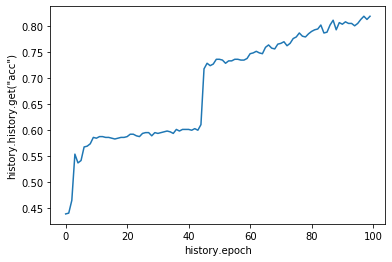

In [21]:
# acc随epoch的变化情况
plt.plot(history.epoch, history.history.get('acc'))
plt.xlabel('history.epoch')
plt.ylabel('history.history.get("acc")')